# Case study: How does a Bike-Share navigate speedy success?

Huong Vo 

November 5, 2021


## I. Introduction
#### Scenario

Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. 

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Since annual members are more profitable than casual riders, the marketing director Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

#### Business task:
This project aims at answering the first question: How do annual members and casual riders use Cyclistic bikes
differently?
Answering this question will provide insights for the team to better understand the customers and how to create an effective marketing program.
#### Data: 
This project uses the latest 12 months data of Cyclistic's trips from Motivate International Inc. The data is suitable for the project and is reliable, coming from a reputable source.

## II. Data wrangling and analysis

#### 1. Import all the neccessary libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# !pip install sqlalchemy
# !pip install ipython-sql
# !pip install matplotlib

In [3]:
dates = ['202010', '202011', '202012'] + [f'20210{i}' for i in range(1, 10)]
frames = [
    pd.read_csv(f"/Volumes/GoogleDrive/My Drive/Google Capstone project/{d}-divvy-tripdata.csv")
    for d in dates
]
data_df = pd.concat(frames)

#### 2. Data wrangling and explorative data analysis

First, we want to preview the dataset to get an understanding of the data.

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5136261 entries, 0 to 756146
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 548.6+ MB


In [5]:
data_df.shape

(5136261, 13)

The dataset has 5,136,261 rows and 13 columns, spanning over the last 12 months. Next, we will find more general information about the dataset.

We see that started_at and ended_at are string objects while they should be date_time format so we change them into datetime format

In [7]:
data_df = data_df.astype({'started_at':'datetime64','ended_at':'datetime64'})
data_df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [8]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual


Next, we want to find out if there are any null values in the data. 

In [9]:
data_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    523467
start_station_id      523781
end_station_name      567268
end_station_id        567501
start_lat                  0
start_lng                  0
end_lat                 4821
end_lng                 4821
member_casual              0
dtype: int64

In [10]:
data_df.isnull().sum()/data_df.count()*100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    11.348155
start_station_id      11.355735
end_station_name      12.415602
end_station_id        12.421335
start_lat              0.000000
start_lng              0.000000
end_lat                0.093950
end_lng                0.093950
member_casual          0.000000
dtype: float64

From this result, we know that about 11-12% of the data have missing start_station_name, id and end_station_name_id, about 1% have misisng end latitude and longitude data. At this point, having those null values probably does not hurt the analysis, so we are going to leave them at that.
Next, we calculate the length of ride for each ride by creating a new variable ride_length

In [11]:
data_df['ride_length'] = data_df['ended_at'] - data_df['started_at']

In [12]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0 days 00:17:29
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0 days 00:14:08
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0 days 00:08:21
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0 days 00:02:52
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0 days 00:16:13


We want to find the min, and max length of ride

In [13]:
data_df.groupby('member_casual').agg({'ride_length':['min','max']}).reset_index()

member_casual        ride_length                 
                               min              max
0        casual -21 days +20:44:05 38 days 20:24:09
1        member -21 days +19:50:02  6 days 15:17:47

Length of ride should all be positive. We count how many non-positive length of ride out there.

In [14]:

negative_df = data_df[data_df['ride_length'] <= pd.Timedelta(value=0,unit='s')]
negative_df['ride_length'].count()


3762

We know that there are 3762 entries with negative or 0 ride_length. By looking at a subset of this data,the ending time is earlier than the starting time, which does not make sense. We are going to correct this error by dropping all the rows with the non-positive length of ride from the dataset.

In [15]:
negative_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
6165,9294FDABA5D390A7,electric_bike,2020-10-01 21:56:57,2020-10-01 21:56:57,Damen Ave & Chicago Ave,128.0,NaN,NaN,41.895617,-87.677102,41.900000,-87.680000,casual,0 days
13744,3084F7EB08CFC5CF,electric_bike,2020-10-06 12:16:59,2020-10-06 12:16:59,WATSON TESTING - DIVVY,676.0,WATSON TESTING - DIVVY,676.0,41.894808,-87.730765,41.894787,-87.730875,casual,0 days
19640,6E2774DC880D8D2C,electric_bike,2020-10-09 14:54:39,2020-10-09 14:54:39,WATSON TESTING - DIVVY,676.0,WATSON TESTING - DIVVY,676.0,41.894778,-87.730859,41.894765,-87.730833,casual,0 days
21235,7730589416BDC116,electric_bike,2020-10-19 18:34:56,2020-10-19 18:34:56,NaN,NaN,NaN,NaN,41.950000,-87.720000,41.950000,-87.720000,casual,0 days
26830,D8A5E7CC637B3149,electric_bike,2020-10-01 10:44:36,2020-10-01 10:44:36,Orleans St & Chestnut St (NEXT Apts),620.0,NaN,NaN,41.898167,-87.637479,41.900000,-87.640000,casual,0 days


In [16]:
data_df.drop(data_df[data_df['ride_length'] <=  pd.Timedelta(value=0,unit='s')].index,inplace=True)

#### 3. Analysis

#### Ride length analysis

Next, we want to know the min and max as well as the average length of ride for each rider category.

In [17]:
data_df.groupby('member_casual')['ride_length'].min()

member_casual
casual   0 days 00:00:01
member   0 days 00:00:01
Name: ride_length, dtype: timedelta64[ns]

In [18]:
data_df.groupby('member_casual')['ride_length'].max()

member_casual
casual   38 days 20:24:09
member    6 days 15:17:47
Name: ride_length, dtype: timedelta64[ns]

In [19]:
data_df.groupby('member_casual')['ride_length'].mean(numeric_only = False)


member_casual
casual   0 days 00:32:50.210911451
member   0 days 00:14:10.102917743
Name: ride_length, dtype: timedelta64[ns]

From the results above, we know that the casual riders spent more time per trip than the members and have higher average riding period and also have the longest trip.

#### Member type analysis

For the next step, we want to find out how many members and casual riders

In [22]:
data_df['member_casual'].value_counts()

member    2758776
casual    2344491
Name: member_casual, dtype: int64

In [23]:
100*(data_df[data_df['member_casual']== 'member']['ride_id'].count())/(data_df['member_casual'].count())

54.05901748820902

From the code above, we know that about 54% of riders are members, while 46% of riders are casual riders.

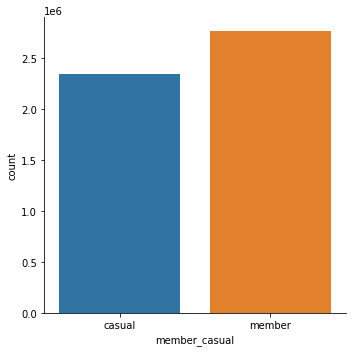

In [24]:
ax = sns.catplot(x='member_casual', kind='count', data=data_df)

#### Rideable types analysis

In [25]:
data_df['rideable_type'].value_counts()

classic_bike     2733883
electric_bike    1698375
docked_bike       671009
Name: rideable_type, dtype: int64

In order to know which of the member_casual proportion of each bike types, we run the following codes:

In [26]:
ride_member = data_df.groupby(['rideable_type','member_casual']).size().reset_index(name='size')
ride_member

,rideable_type,member_casual,size
0,classic_bike,casual,1114204
1,classic_bike,member,1619679
2,docked_bike,casual,404690
3,docked_bike,member,266319
4,electric_bike,casual,825597
5,electric_bike,member,872778


In [51]:
ride_member_plot = ride_member.groupby(['rideable_type','member_casual'])['size'].sum().unstack().fillna(0)
ride_member_plot

member_casual,casual,member
rideable_type,,
classic_bike,1114204,1619679
docked_bike,404690,266319
electric_bike,825597,872778


From the result above, we can see that compared to the casual riders,the number of member users are higher for classic bike, lower for docked bike and about the same for electric bike. We can see that the members prefer classic bikes compared to other type of bikes.

We want to make a chart to illustrate different rideable types with member and casual riders proponent for each category of rides

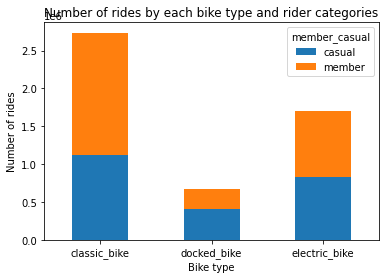

In [28]:
ride_member_plot.plot(kind='bar',stacked=True)
plt.title('Number of rides by each bike type and rider categories')
plt.xticks(rotation=0)
plt.xlabel('Bike type')
plt.ylabel('Number of rides')
plt.show()

#### Rides vs. Weekday

We want also to find out which date of the week has the most rides

In [29]:
data_df['weekday'] = data_df['started_at'].dt.dayofweek
data_df['weekday'].value_counts()

5    918232
6    785419
4    740044
3    691072
2    675816
1    654290
0    638394
Name: weekday, dtype: int64

In [30]:
data_df['weekday'].value_counts().idxmax()

5

Next, we want to see the differences in ride trips among members and casual riders with respective to different weekdays

In [31]:
weekday_member = data_df.groupby(['weekday','member_casual']).size().reset_index(name='size')
weekday_member

,weekday,member_casual,size
0,0,casual,264973
1,0,member,373421
2,1,casual,250025
3,1,member,404265
4,2,casual,255777
5,2,member,420039
6,3,casual,273174
7,3,member,417898
8,4,casual,337275
9,4,member,402769


In [32]:
weekday_member_plot = weekday_member.groupby(['weekday','member_casual'])['size'].sum().unstack().fillna(0)
weekday_member_plot

member_casual,casual,member
weekday,,
0,264973,373421
1,250025,404265
2,255777,420039
3,273174,417898
4,337275,402769
5,520810,397422
6,442457,342962


From the result above, we see that member users are more active during Monday to Friday with more users; whereas casual riders ride more on the weekends. This implies that members are using more of the bike service to go to work while the casual riders use more bike for leisure time.

Next, we want to make bar chart to see the difference in rides among different weekdays and the member_casual component of each day.

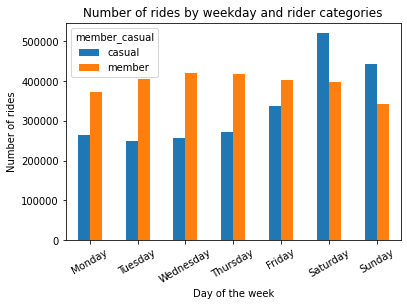

In [50]:
weekday_member_plot.plot(kind='bar',stacked=False)
plt.title('Number of rides by weekday and rider categories')
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=30)
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')
plt.show()

It is also helpful to find out the average length of ride for each day of the week.

In [35]:
data_df.groupby(['weekday','member_casual'])['ride_length'].mean(numeric_only=False)

weekday  member_casual
0        casual          0 days 00:32:32.253138999
         member          0 days 00:13:40.638485784
1        casual          0 days 00:29:20.474504549
         member          0 days 00:13:20.033329622
2        casual          0 days 00:28:37.062206531
         member          0 days 00:13:24.439263973
3        casual          0 days 00:28:22.966431651
         member          0 days 00:13:17.767579648
4        casual          0 days 00:31:24.137181824
         member          0 days 00:14:00.686909866
5        casual          0 days 00:35:35.569798966
         member          0 days 00:15:44.103167413
6        casual          0 days 00:38:01.792567413
         member          0 days 00:16:03.031105486
Name: ride_length, dtype: timedelta64[ns]

We see that during everyday of the week,the amount of time per trip of members are shorter than casual riders, with the average members ride the bike for about 13-16 minutes and the casual riders ride the bike for 28-38 minutes on average.

#### Rides vs. Months

Next, we are going to explore what months have the most trips.

In [38]:
import datetime as dt
data_df['start_month'] = data_df['started_at'].dt.month

In [39]:
month_member = data_df.groupby(['start_month','member_casual']).size().reset_index(name='size')
month_member_plot = month_member.groupby(['start_month','member_casual'])['size'].sum().unstack().fillna(0)
month_member_plot

member_casual,casual,member
start_month,,
1,17971,78132
2,10055,39299
3,83102,142874
4,135252,198715
5,255202,272827
6,368804,357050
7,440129,378530
8,410781,389821
9,362192,390211


In [48]:
print('casual mean',month_member_plot['casual'].mean())
print('casual std',month_member_plot['casual'].std())

casual mean 195374.25
casual std 162804.78618725334


In [49]:
print('member mean',month_member_plot['member'].mean())
print('member std',month_member_plot['member'].std())

member mean 229898.0
member std 127847.8260930833


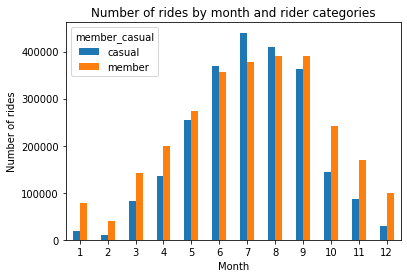

In [44]:
month_member_plot.plot(kind='bar',stacked=False)
plt.title('Number of rides by month and rider categories')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.show()


From the result above, we can see that summer months from June to August have the most rides. While casual members' number of trips fluctuate more then the members (with higher standard deviation).

#### Rides vs. Location

 Next, we are going to find out if there is a difference in started and ended locations for each rider type

In [36]:
data_df.groupby(['member_casual','start_station_name']).size().sort_values(ascending=False).head(10)

member_casual  start_station_name       
casual         Streeter Dr & Grand Ave      61700
               Millennium Park              31908
               Michigan Ave & Oak St        29148
member         Clark St & Elm St            23749
casual         Lake Shore Dr & Monroe St    23362
member         Wells St & Concord Ln        21897
casual         Shedd Aquarium               21782
               Theater on the Lake          21567
member         Kingsbury St & Kinzie St     20881
               Wells St & Elm St            19718
dtype: int64

In [52]:
data_df.groupby(['member_casual','end_station_name']).size().sort_values(ascending=False).head(20)

member_casual  end_station_name          
casual         Streeter Dr & Grand Ave       63495
               Millennium Park               32929
               Michigan Ave & Oak St         30405
member         Clark St & Elm St             24166
casual         Theater on the Lake           23114
member         Wells St & Concord Ln         22569
casual         Lake Shore Dr & Monroe St     21931
member         Kingsbury St & Kinzie St      21204
               Wells St & Elm St             20174
casual         Shedd Aquarium                19970
               Lake Shore Dr & North Blvd    19366
member         Dearborn St & Erie St         19101
casual         Wells St & Concord Ln         18349
member         St. Clair St & Erie St        18181
               Broadway & Barry Ave          18142
               Wells St & Huron St           17335
casual         Clark St & Lincoln Ave        16784
               Wabash Ave & Grand Ave        16544
               Indiana Ave & Roosevelt R

From the result above, we can see that the popular start and end locations for casual riders are Streeter De & Grand Ave, Millenium Park and Michigan Ave & Oak st; whereas the members usually start and end at Clark & Elm st, Wells St & Concord Ln. 

Compared to the casual riders, the member riders' start and end stations are more spread out.

## III. Key findings

* Cyclistic riders compose of 54% annual members and 46% of casual riders.
* Among the three types of bikes, members users use more classic and eletric bikes while casual members use more docked bikes.
* During everyday of the week,the amount of time per trip of members are shorter than casual riders, with the average members ride the bike for about 13-16 minutes and the casual riders ride the bike for 28-38 minutes on average.
* Member users are more active during Monday to Friday; whereas casual riders ride more on the weekends. 
* Summer months from June to August have the most rides. Casual rides are more than member rides in June, July and August.Compared to the members, casual riders' number of rides varies more widely. 
* From the result above, we can see that the majority of start and end locations for casual riders are at Streeter De & Grand Ave, Millenium Park and Michigan Ave & Oak st while the members's start and end location are more spread out.


## IV. Recommendations

* Most of the differences in the uses of member and casual riders can be explained their use purposes. Members are more likely to use the bikes for work, with convenient and dispersed locations, shorter rides, and are more active during work week. On the contrary, casual riders are more likely to use the bike for leisure, with longer average rides, mostly on weekends and in the summer months when weather is nice. 
* If the company wants to convert casual riders to members, we can market the convenience of our service for work not just leisure, such as the amount of time saved because of our many dispersed staions. An additional idea might be to give a discount to attract the leisure riders to convert to our full membership. 
* In order to help with figuring out the best marketing plan, ddditional research must be done on why casual riders would buy a membership, and how digital media could affect their marketing tactics.
